In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
df = pd.read_csv("notes.csv")
df.head()


,NOM,PRENOM,Base de donnÃ©e,Analyse de donnÃ©e,Traitement de signal,CMS,Technique de communication,Math pour AI,Python pour AI,Moyenne,Status
0,ACHENAN,ALI,12.5,14.3,9.8,11.0,10.4,13.7,15.2,12.41,ValidÃ©
1,AIT AISSA,RACHID,7.2,9.0,8.5,6.3,9.1,10.0,8.4,8.36,Non ValidÃ©
2,AIT-OUARAB,HAJAR,11.3,10.9,13.5,12.0,11.8,12.4,13.7,12.23,ValidÃ©
3,AITOUHAMMOU,AYMANE,13.1,12.7,10.5,14.6,12.2,10.8,12.9,12.40,ValidÃ©
4,AMAZIGH,ABDELMOTTALEB,11.8,10.5,12.0,13.1,9.8,14.2,12.6,11.43,ValidÃ©


In [57]:
X = df[[
    "Base de donnÃ©e",
    "Analyse de donnÃ©e",
    "Traitement de signal",
    "CMS",
    "Technique de communication",
    "Math pour AI",
    "Python pour AI"
]]

# La colonne de la cible
y = df["Moyenne"]

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Entraînement du modèle
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
# Coefficients et intercept
print("coefficients : ", model.coef_)
print("intercept : ", model.intercept_)

coefficients :  [0.05108674 0.15739038 0.14831072 0.15554171 0.16924171 0.16697494
 0.14878587]
intercept :  0.003865066168316389


In [62]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

In [63]:
from sklearn import metrics
import numpy as np  
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R²:", metrics.r2_score(y_test, y_pred))

MAE: 0.09575794709026934
MSE: 0.02977752581901734
RMSE: 0.17256165802117612
R²: 0.9911725757152816


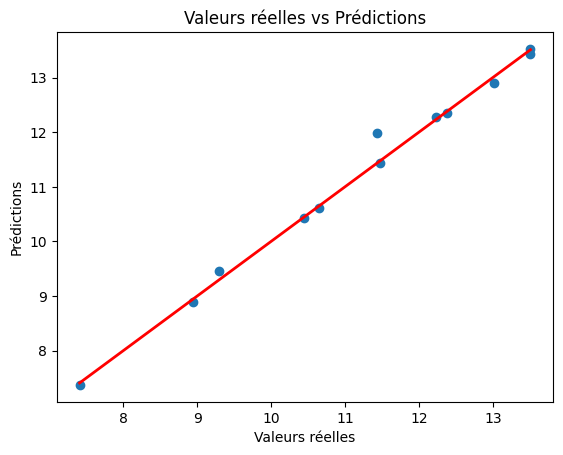

In [64]:
plt.scatter(y_test, y_pred)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Valeurs réelles vs Prédictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.show()


In [65]:
new_students = [[13, 16, 11, 14, 12, 15, 17]] 
predictions = model.predict(new_students)
print("Noyennes prédites:", predictions)

Noyennes prédites: [14.06012531]


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Regression Logistic

In [73]:
# Entrées
X = df[[
    "Base de donnÃ©e",
    "Analyse de donnÃ©e",
    "Traitement de signal",
    "CMS",
    "Technique de communication",
    "Math pour AI",
    "Python pour AI"
]]

# Cible binaire : 1 si Moyenne >= 10, sinon 0
y = (df["Moyenne"] >= 10).astype(int)


In [81]:
# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [75]:
from sklearn.linear_model import LogisticRegression
# Modèle de régression logistique
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [76]:
# Prédictions
y_pred = logreg.predict(X_test)

In [77]:
# Évaluation
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Matrice de confusion:\n", metrics.confusion_matrix(y_test, y_pred))
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 1.0
Matrice de confusion:
 [[3 0]
 [0 9]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         9

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



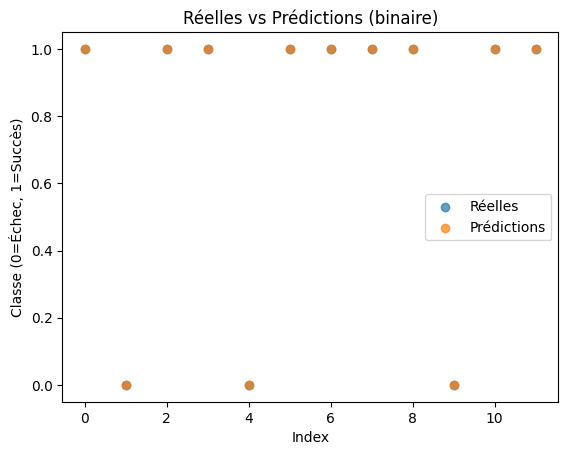

In [78]:
# Visualisation
plt.scatter(range(len(y_test)), y_test, label="Réelles", alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label="Prédictions", alpha=0.7)
plt.legend()
plt.title("Réelles vs Prédictions (binaire)")
plt.xlabel("Index")
plt.ylabel("Classe (0=Échec, 1=Succès)")
plt.show()


In [79]:
# Exemple de prédiction
new_students = [[13, 16, 11, 14, 12, 15, 17]] 
prediction = logreg.predict(new_students)
print("Admission prédite (1 = Oui, 0 = Non):", prediction)

Admission prédite (1 = Oui, 0 = Non): [1]


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
